<a href="https://colab.research.google.com/github/KevinCantrell/CHM477_Fitting/blob/master/NonLinearModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import io

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
rawDataArray = np.genfromtxt(io.StringIO(uploaded[fn].decode('utf-8')), delimiter=',')

#In Spyder you should replace the 5 lines above with the following line, and make sure the file named 'gaussian fit data easy.csv' is in the same directory as your script
#rawDataArray = np.genfromtxt('gaussian fit data easy.csv', delimiter=',')

time=rawDataArray[1:,0]
signal=rawDataArray[1:,1]

Saving gaussian fit data easy.csv to gaussian fit data easy.csv
User uploaded file "gaussian fit data easy.csv" with length 2829 bytes


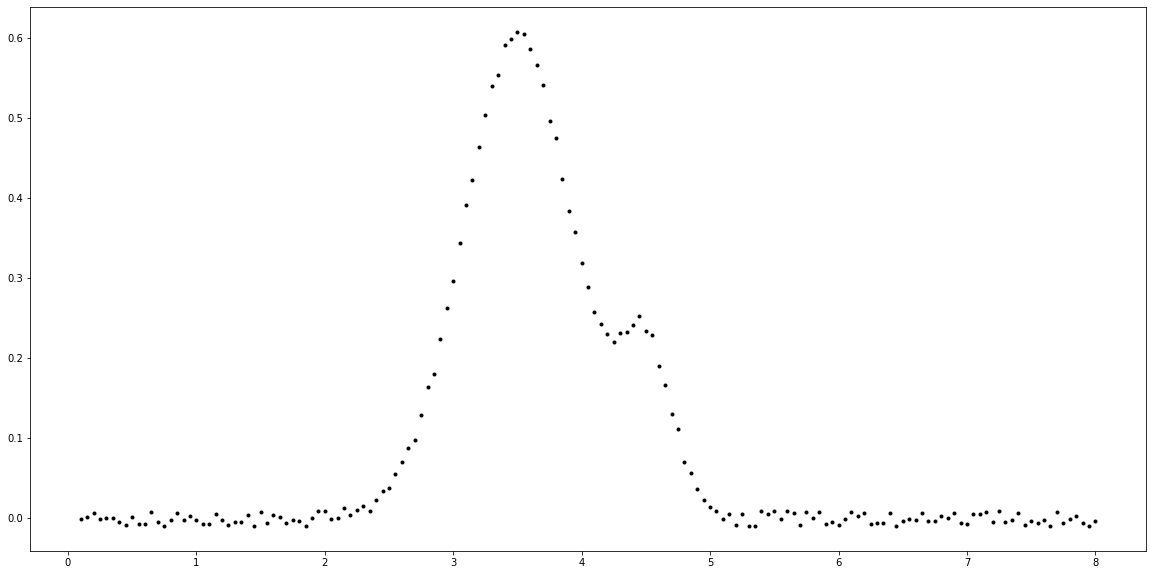

In [57]:
fig,axRaw=plt.subplots(figsize=(20,10))
axRaw.plot(time,signal,'.k')

Estimate the height of the first feature:.9
Estimate the center of the first feature:3.3
Estimate the width at half max of the first feature:2


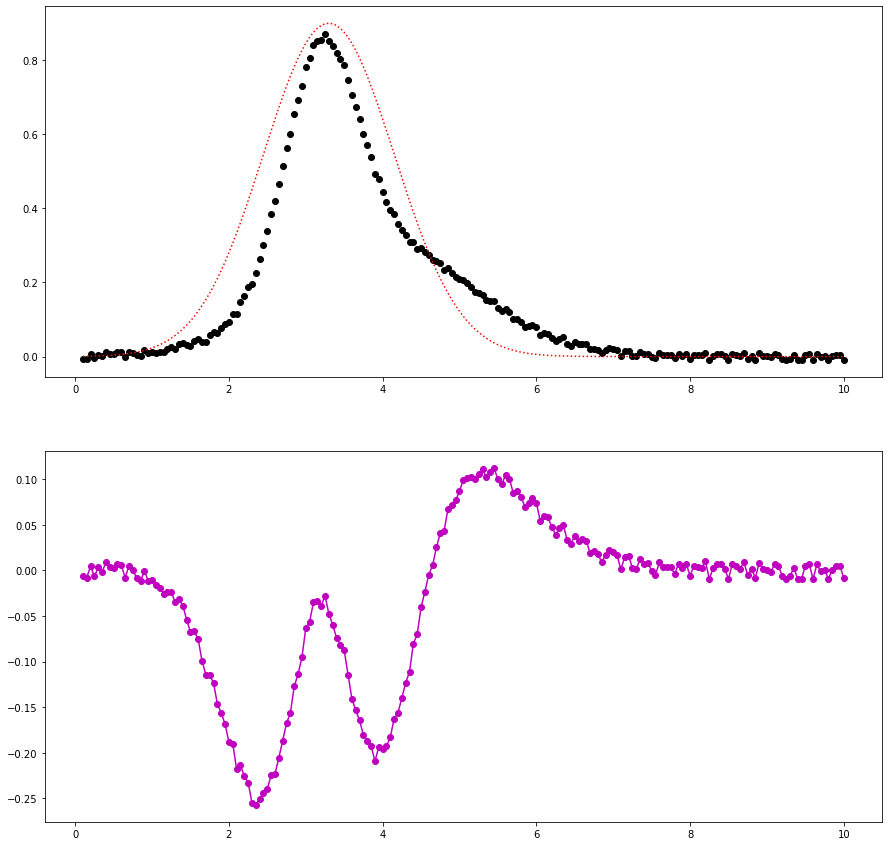

In [0]:
from scipy.optimize import curve_fit

def gaus(x,height,center,fwhm):
    standardDeviation=fwhm/2.35
    return height*np.exp(-(x-center)**2/(2*standardDeviation**2))

def gaus2(x,height_1,center_1,fwhm_1,height_2,center_2,fwhm_2):
    g1=gaus(x,height_1,center_1,fwhm_1)
    g2=gaus(x,height_2,center_2,fwhm_2)
    return g1+g2

#look at the data an make some estimates of the height, center, and half width of the larger peak
height_1_guess=float(input("Estimate the height of the first feature:"))
center_1_guess=float(input("Estimate the center of the first feature:"))
fwhm_1_guess=float(input("Estimate the width at half max of the first feature:"))

#calculate a Gaussian function using the guesses you made in the top row
gausGuess1=gaus(time,height_1_guess,center_1_guess,fwhm_1_guess)

#make a figure with two rows, the top row for data and fits, the bottom for residuals
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,15))

#plot the raw data in the upper row as black circles
ax1.plot(time,signal,'ok')
#plot the guess in the upper row as a dotted red line
ax1.plot(time,gausGuess1,':r')

#calculate the difference and display it in the bottom row
ax2.plot(time,signal-gausGuess1,'-om')

#go back and adjust your guesses until things look right

Estimate the height of the second feature:.15
Estimate the center of the first feature:5.5
Estimate the width at half max of the first feature:1


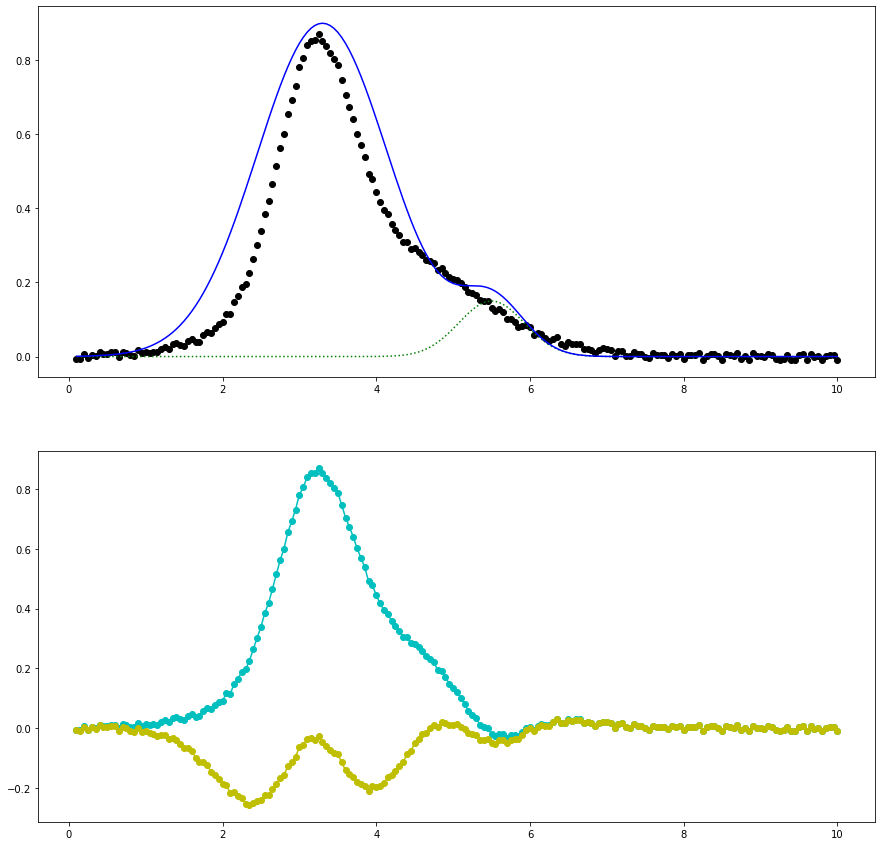

In [0]:
#use the the difference in the bottom row to make estimates of the smaller Gaussian peak
height_2_guess=float(input("Estimate the height of the second feature:"))
center_2_guess=float(input("Estimate the center of the first feature:"))
fwhm_2_guess=float(input("Estimate the width at half max of the first feature:"))

#calculate a Gaussian function using the guesses you made
gausGuess2=gaus(time,height_2_guess,center_2_guess,fwhm_2_guess)

#make a figure with two rows, the top row for data and fits, the bottom for residuals
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,15))
ax1.plot(time,signal,'ok')

ax1.plot(time,gausGuess2,':g')
#calculate the difference and display it in the bottom row
ax2.plot(time,signal-gausGuess2,'-oc')

#plot the sum of the two Gaussians in the top row
ax1.plot(time,gausGuess1+gausGuess2,'-b')
#calculate the difference and display it in the bottom row
ax2.plot(time,signal-gausGuess1-gausGuess2,'-oy')


optimized parametres are: [0.61659577 3.20058624 1.09794227 0.30095538 3.99366428 2.79956534]
optimized parametres errors are: [0.00351945 0.00198819 0.00626252 0.0029042  0.01118161 0.01426334]


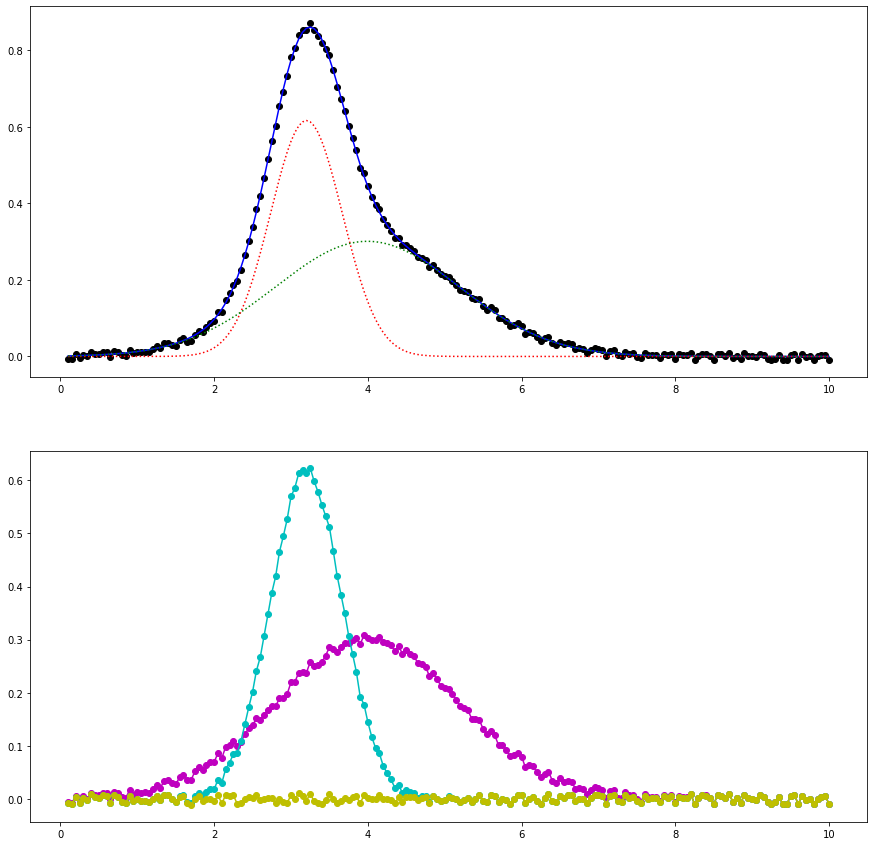

In [0]:
#We can use our earlier estimates as a starting point for curve_fit
#They are provided as the optional argument p0
#If no starting point is provided they all default to 1
#You can see it fail by running the line below
# optimized_parameters,covarianceMatrix=curve_fit(gaus2,time,signal)


#height_1_guess=0.6
#center_1_guess=3.5
#fwhm_1_guess=1
#height_2_guess=0.2
#center_2_guess=4.5
#fwhm_2_guess=0.7

optimized_parameters,varianceCovarianceMatrix=curve_fit(gaus2,time,signal,p0=[height_1_guess,center_1_guess,fwhm_1_guess,height_2_guess,center_2_guess,fwhm_2_guess])
#We can pull out the individual parameters from the returned array
height_1=optimized_parameters[0]
center_1=optimized_parameters[1]
fwhm_1=optimized_parameters[2]
height_2=optimized_parameters[3]
center_2=optimized_parameters[4]
fwhm_2=optimized_parameters[5]

#We also get a standard error for each one by taking the square root of the variances along the diagonal of the other returned array
paramterErros=np.sqrt(np.diagonal(varianceCovarianceMatrix))

print('optimized parametres are: '+ str(optimized_parameters))
print('optimized parametres errors are: '+ str(paramterErros))

#now we can make a new figure like the first one, but using our optimized estimates
fig2,(axo1,axo2)=plt.subplots(2,1,figsize=(15,15))
axo1.plot(time,signal,'ok')
fitSignalTotal=gaus2(time,height_1,center_1,fwhm_1,height_2,center_2,fwhm_2)
fitSignal1=gaus(time,height_1,center_1,fwhm_1)
fitSignal2=gaus(time,height_2,center_2,fwhm_2)
axo1.plot(time,fitSignalTotal,'-b')
axo1.plot(time,fitSignal1,':r')
axo1.plot(time,fitSignal2,':g')
axo2.plot(time,signal-fitSignal1,'-om')
axo2.plot(time,signal-fitSignal2,'-oc')
axo2.plot(time,signal-fitSignalTotal,'-oy')

#Now try the process again using the harder dataset